# Logistic Regression on Household Income Level and Energy Consumption Behavior.

### Data Wrangling:

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [303]:
for i in range(60):
    globals()["path_{}".format(i+1)]="../share/Power-Networks-LCL-June2015(withAcornGps).csv_Pieces/Power-Networks-LCL-June2015(withAcornGps)v2_%d.csv"%(i+1)
    globals()["df_{}".format(i+1)]=pd.read_csv(globals()["path_{}".format(i+1)])
    globals()["df_{}".format(i+1)].DateTime = pd.to_datetime(globals()["df_{}".format(i+1)].DateTime)
    globals()["df_{}".format(i+1)] = globals()["df_{}".format(i+1)][globals()["df_{}".format(i+1)].DateTime.dt.month == 12]   
    df_1 = pd.concat([globals()["df_{}".format(i+1)], df_1], axis = 0)

In [585]:
df = df_1.drop_duplicates()

In [586]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
14973,MAC002372,Std,2013-12-01 00:00:00,0.096,ACORN-E,Affluent
14974,MAC002372,Std,2013-12-01 00:30:00,0.051,ACORN-E,Affluent
14975,MAC002372,Std,2013-12-01 01:00:00,0.03,ACORN-E,Affluent
14976,MAC002372,Std,2013-12-01 01:30:00,0.03,ACORN-E,Affluent
14977,MAC002372,Std,2013-12-01 02:00:00,0.038,ACORN-E,Affluent


In [588]:
df_eco = df.iloc[:,(0,-1)].drop_duplicates()
df_eco.head()

,LCLid,Acorn_grouped
14973,MAC002372,Affluent
29494,MAC002373,Adversity
53153,MAC002374,Affluent
66297,MAC002375,Affluent
98501,MAC002376,Comfortable


In [589]:
df.iloc[:,3] = pd.to_numeric(df.iloc[:,3],errors='coerce')

df_p = df.pivot_table(values='KWH/hh (per half hour) ', index = "DateTime", columns = "LCLid" )

In [590]:
df_tem = df_p.reset_index()

In [727]:
df_p = df_tem[df_tem.DateTime.dt.year == 2013]
df_p.head()

LCLid,DateTime,MAC000002,MAC000003,MAC000004,MAC000006,MAC000007,MAC000008,MAC000009,MAC000010,MAC000011,...,MAC002395,MAC002396,MAC002397,MAC002399,MAC002400,MAC002401,MAC002402,MAC002403,MAC002405,MAC002406
3275,2013-12-01 00:00:00,0.222,1.327,0.000,0.044,0.095,NaN,0.046,0.863,0.149,...,0.328,1.208,0.297,0.075,0.177,0.764,0.316,NaN,0.219,0.242
3276,2013-12-01 00:30:00,0.240,1.317,0.000,0.053,0.069,NaN,0.096,0.403,0.189,...,0.339,0.410,0.200,0.172,0.296,0.681,0.324,NaN,0.211,0.397
3277,2013-12-01 01:00:00,0.218,0.835,0.219,0.015,0.057,NaN,0.037,0.318,0.115,...,0.249,0.342,0.089,0.064,0.168,0.249,0.317,NaN,0.183,0.295
3278,2013-12-01 01:30:00,0.136,0.125,0.000,0.034,0.056,NaN,0.039,0.182,0.136,...,0.042,0.378,0.198,0.054,0.167,0.209,0.232,NaN,0.729,0.180
3279,2013-12-01 02:00:00,0.115,0.479,0.000,0.033,0.056,NaN,0.095,0.169,0.120,...,0.082,0.331,0.275,0.024,0.167,0.256,0.078,NaN,0.092,0.123


In [592]:
df_p["Time"] = df_p.DateTime.dt.time
df_p["Date"] = df_p.DateTime.dt.weekday

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [593]:
df_p.T.head()

,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,...,4753,4754,4755,4756,4757,4758,4759,4760,4761,4762
LCLid,,,,,,,,,,,,,,,,,,,,,
DateTime,2013-12-01 00:00:00,2013-12-01 00:30:00,2013-12-01 01:00:00,2013-12-01 01:30:00,2013-12-01 02:00:00,2013-12-01 02:30:00,2013-12-01 03:00:00,2013-12-01 03:30:00,2013-12-01 04:00:00,2013-12-01 04:30:00,...,2013-12-31 19:00:00,2013-12-31 19:30:00,2013-12-31 20:00:00,2013-12-31 20:30:00,2013-12-31 21:00:00,2013-12-31 21:30:00,2013-12-31 22:00:00,2013-12-31 22:30:00,2013-12-31 23:00:00,2013-12-31 23:30:00
MAC000002,0.222,0.24,0.218,0.136,0.115,0.093,0.12,0.081,0.125,0.076,...,0.252,0.307,0.833,0.4,0.332,0.451,0.456,0.402,0.491,0.452
MAC000003,1.327,1.317,0.835,0.125,0.479,0.06,0.099,0.339,0.098,0.378,...,0.122,0.099,0.053,0.087,0.061,0.059,0.391,0.093,0.06,0.089
MAC000004,0,0,0.219,0,0,0,0,0,0.169,0,...,0.169,0,0,0,0.017,0.161,0,0,0,0.157
MAC000006,0.044,0.053,0.015,0.034,0.033,0.016,0.051,0.016,0.037,0.028,...,0.1,0.127,0.116,0.102,0.142,0.067,0.076,0.078,0.04,0.073


In [594]:
df_gr = df_p.groupby(["Date", "Time"], axis = 0).mean()

In [595]:
df_gr = df_gr.T

In [596]:
df_gr.shape

(1926, 336)

In [597]:
df_gr = df_gr.reset_index()

In [598]:
df_gr = df_gr.merge(df_eco, on ="LCLid", how = "inner")

In [599]:
df_gr.dropna(axis = 0, inplace = True)

In [600]:
df_gr.shape

(1746, 339)

In [601]:
df_gr = df_gr.merge(df_eco, on ="LCLid")

In [602]:
df_gr.head()

,LCLid,"(LCLid, )","(0, 00:00:00)","(0, 00:30:00)","(0, 01:00:00)","(0, 01:30:00)","(0, 02:00:00)","(0, 02:30:00)","(0, 03:00:00)","(0, 03:30:00)",...,"(6, 20:00:00)","(6, 20:30:00)","(6, 21:00:00)","(6, 21:30:00)","(6, 22:00:00)","(6, 22:30:00)","(6, 23:00:00)","(6, 23:30:00)",Acorn_grouped_x,Acorn_grouped_y
0,MAC000002,MAC000002,0.3796,0.3480,0.2726,0.1916,0.1408,0.1214,0.0970,0.1142,...,1.1084,0.5670,0.4854,0.5292,0.5388,0.5700,0.3974,0.383,Affluent,Affluent
1,MAC000003,MAC000003,1.6474,1.6030,1.2880,0.4688,0.6350,0.5076,0.4814,0.5730,...,0.1884,0.1544,0.1612,0.1020,0.0756,0.1022,0.0790,0.079,Adversity,Adversity
2,MAC000004,MAC000004,0.0946,0.0342,0.0334,0.0000,0.0610,0.0598,0.0714,0.0000,...,0.0000,0.0322,0.0004,0.0344,0.1044,0.0354,0.0000,0.000,Affluent,Affluent
3,MAC000006,MAC000006,0.0402,0.0420,0.0382,0.0324,0.0230,0.0386,0.0238,0.0252,...,0.1080,0.1162,0.1294,0.1176,0.1096,0.0936,0.0574,0.056,Adversity,Adversity
4,MAC000007,MAC000007,0.0960,0.0612,0.0686,0.0632,0.0630,0.0666,0.0632,0.0778,...,0.2926,0.4422,0.2758,0.3778,0.4394,0.4212,0.2900,0.167,Comfortable,Comfortable


In [603]:
## drop the houses with unknown mark "Acorn-U"
df_gr = df_gr[df_gr.iloc[:, -1] != 'ACORN-U']

In [604]:
df_gr.head()

,LCLid,"(LCLid, )","(0, 00:00:00)","(0, 00:30:00)","(0, 01:00:00)","(0, 01:30:00)","(0, 02:00:00)","(0, 02:30:00)","(0, 03:00:00)","(0, 03:30:00)",...,"(6, 20:00:00)","(6, 20:30:00)","(6, 21:00:00)","(6, 21:30:00)","(6, 22:00:00)","(6, 22:30:00)","(6, 23:00:00)","(6, 23:30:00)",Acorn_grouped_x,Acorn_grouped_y
0,MAC000002,MAC000002,0.3796,0.3480,0.2726,0.1916,0.1408,0.1214,0.0970,0.1142,...,1.1084,0.5670,0.4854,0.5292,0.5388,0.5700,0.3974,0.383,Affluent,Affluent
1,MAC000003,MAC000003,1.6474,1.6030,1.2880,0.4688,0.6350,0.5076,0.4814,0.5730,...,0.1884,0.1544,0.1612,0.1020,0.0756,0.1022,0.0790,0.079,Adversity,Adversity
2,MAC000004,MAC000004,0.0946,0.0342,0.0334,0.0000,0.0610,0.0598,0.0714,0.0000,...,0.0000,0.0322,0.0004,0.0344,0.1044,0.0354,0.0000,0.000,Affluent,Affluent
3,MAC000006,MAC000006,0.0402,0.0420,0.0382,0.0324,0.0230,0.0386,0.0238,0.0252,...,0.1080,0.1162,0.1294,0.1176,0.1096,0.0936,0.0574,0.056,Adversity,Adversity
4,MAC000007,MAC000007,0.0960,0.0612,0.0686,0.0632,0.0630,0.0666,0.0632,0.0778,...,0.2926,0.4422,0.2758,0.3778,0.4394,0.4212,0.2900,0.167,Comfortable,Comfortable


## Let's run the Logistic Regression

In [616]:
from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.asarray(train), df_gr.Acorn_grouped_x, test_size=0.33)

logit = LogisticRegression(C=1e5)
logit.fit(np.c_[X_train], y_train)
logit.intercept_

predlabels = logit.predict(X_test)
predlabels = predlabels.astype(str)

truelabels = y_test


In [617]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(truelabels, predlabels)
mat

array([[85, 69, 46],
       [75, 85, 57],
       [77, 40, 40]])

In [618]:
acc = 100*float(mat[0][0]+mat[1][1]+mat[2][2])/np.sum(mat)
print ("The accuracy of my model is %0.2f%%"%acc)

The accuracy of my model is 36.59%


## The accuracy of my model is low for logistic regression. 

## Normalize the data for PCA:


In [650]:
df_mean = np.nanmean(df_gr.iloc[:,2:-2], axis = 1)
df_std = np.nanmean(df_gr.iloc[:,2:-2], axis = 1)
df_gr.iloc[:,2:-2] = df_gr.iloc[:,2:-2].apply(lambda x: (x - df_mean)/df_std)

## PCA

In [659]:
df_gr_nor = df_gr.copy()
df_gr_nor = df_gr_nor.dropna(how = "any")

the accuracy of my model for IS is 0.4342, for OS is 0.3909
0.857769936319


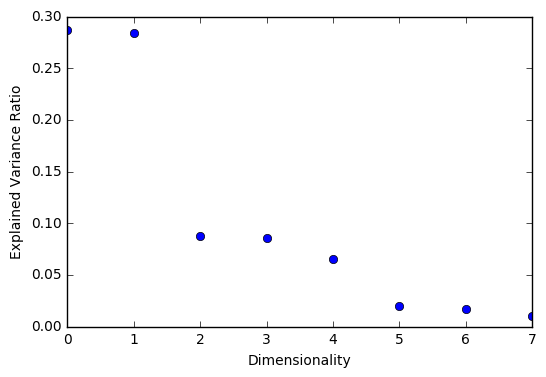

In [695]:
n=8
pca = PCA(n)
acc_OS_1 = []
acc_IS_1 = []

X_train, X_test, y_train, y_test = train_test_split(np.asarray(df_gr_nor.iloc[:,2:-2]), df_gr_nor.Acorn_grouped_x, test_size=0.33)

Xproj = pca.fit_transform(X_train)
logit.fit(np.c_[Xproj], y_train)
predlabels_IS = logit.predict(Xproj)
predlabels_IS = predlabels_IS.astype(str)

predlabels_OS = logit.predict(pca.fit_transform(X_test))
predlabels_OS = predlabels_OS.astype(str)

truelabels_IS = y_train
truelabels_OS = y_test

mat_IS = confusion_matrix(truelabels_IS, predlabels_IS)
mat_OS = confusion_matrix(truelabels_OS, predlabels_OS)

acc_IS = float(mat_IS[0][0]+mat_IS[1][1]+mat_IS[2][2])/np.sum(mat_IS)
acc_OS = float(mat_OS[0][0]+mat_OS[1][1]+mat_OS[2][2])/np.sum(mat_OS)

print ("the accuracy of my model for IS is %0.4f, for OS is %0.4f")%(acc_IS, acc_OS)
print pca.explained_variance_ratio_.sum()

eigenvalues = pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()


---

### Cluster

In [744]:
df_gr_nor.head()

,LCLid,"(LCLid, )","(0, 00:00:00)","(0, 00:30:00)","(0, 01:00:00)","(0, 01:30:00)","(0, 02:00:00)","(0, 02:30:00)","(0, 03:00:00)","(0, 03:30:00)",...,"(6, 20:00:00)","(6, 20:30:00)","(6, 21:00:00)","(6, 21:30:00)","(6, 22:00:00)","(6, 22:30:00)","(6, 23:00:00)","(6, 23:30:00)",Acorn_grouped_x,Acorn_grouped_y
0,MAC000002,MAC000002,0.507086,0.381628,0.082275,-0.239311,-0.440997,-0.518018,-0.614891,-0.546604,...,3.400564,1.251101,0.927133,1.101027,1.139141,1.263011,0.577756,0.520585,Affluent,Affluent
1,MAC000003,MAC000003,3.828483,3.698348,2.775091,0.374040,0.861167,0.487761,0.410970,0.679447,...,-0.447805,-0.547458,-0.527527,-0.701041,-0.778419,-0.700455,-0.768453,-0.768453,Adversity,Adversity
2,MAC000004,MAC000004,1.571671,-0.070284,-0.092031,-1.000000,0.658266,0.625644,0.940987,-1.000000,...,-1.000000,-0.124653,-0.989126,-0.064847,1.838081,-0.037662,-1.000000,-1.000000,Affluent,Affluent
3,MAC000006,MAC000006,-0.476556,-0.453119,-0.502598,-0.578120,-0.700517,-0.497390,-0.690101,-0.671871,...,0.406266,0.513038,0.684915,0.531268,0.427100,0.218764,-0.252595,-0.270825,Adversity,Adversity
4,MAC000007,MAC000007,-0.636321,-0.768154,-0.740121,-0.760578,-0.761335,-0.747697,-0.760578,-0.705268,...,0.108464,0.675198,0.044820,0.431230,0.664591,0.595643,0.098615,-0.367349,Comfortable,Comfortable


In [746]:
from sklearn.cluster import KMeans

In [747]:
model = KMeans(n_clusters=3).fit(df_gr_nor.iloc[:,2:-2])

In [749]:
df_gr_nor["clusterlabel"] = model.labels_

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [755]:
df_gr_nor.iloc[:, -2:].head(10)

,Acorn_grouped_y,clusterlabel
0,Affluent,0
1,Adversity,0
2,Affluent,0
3,Adversity,0
4,Comfortable,0
5,Adversity,0
6,Comfortable,0
7,Adversity,0
8,Affluent,0
9,Adversity,0


## The clustering results do not seem right at all! 

---

## Cross Validation, with different regularized force of logistic regression

In [742]:
n=50
acc_OS_1 = []
acc_IS_1 = []
l = [0.01, 0.001, 0.0001]


from sklearn.cross_validation import train_test_split

for j in l:
    logit = LogisticRegression(C=j)
    
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(np.asarray(train.iloc[:, :-2]), df_gr.Acorn_grouped_x, test_size=0.33)
        logit.fit(np.c_[X_train], y_train)
        predlabels_IS = logit.predict(X_train)
        predlabels_IS = predlabels_IS.astype(str)

        predlabels_OS = logit.predict(X_test)
        predlabels_OS = predlabels_OS.astype(str)

        truelabels_IS = y_train
        truelabels_OS = y_test

        mat_IS = confusion_matrix(truelabels_IS, predlabels_IS)
        mat_OS = confusion_matrix(truelabels_OS, predlabels_OS)

        acc_IS = float(mat_IS[0][0]+mat_IS[1][1]+mat_IS[2][2])/np.sum(mat_IS)
        acc_OS = float(mat_OS[0][0]+mat_OS[1][1]+mat_OS[2][2])/np.sum(mat_OS)

        acc_IS_1.append(acc_IS)                                                                     
        acc_OS_1.append(acc_OS)
   
    print ("The accuracy of logistic regression OS is %0.4f%%, with C= %0.4f"%(np.array(acc_OS_1).mean(),j))
    print ("The accuracy of logistic regression IS is %0.4f%%, with C= %0.4f"%(np.array(acc_IS_1).mean(),j))


The accuracy of logistic regression OS is 0.4104%, with C= 0.0100
The accuracy of logistic regression IS is 0.4394%, with C= 0.0100
The accuracy of logistic regression OS is 0.4096%, with C= 0.0010
The accuracy of logistic regression IS is 0.4330%, with C= 0.0010
The accuracy of logistic regression OS is 0.4075%, with C= 0.0001
The accuracy of logistic regression IS is 0.4294%, with C= 0.0001


In [410]:
dic = {'Affluent': '1' , 'Adversity': "2", 'Comfortable': "3", 'ACORN-U': "4"}

df_gr.Acorn_grouped_x = df_gr.Acorn_grouped_x.map(dic)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [434]:
df_gr.shape

(1737, 340)

## Lasso 

In [419]:
from sklearn import linear_model

lambdas = np.linspace(-6,1,100)
lambdas=[np.exp(i) for i in lambdas]
for i in lambdas:

    Lasso=linear_model.Lasso(fit_intercept=True,alpha= i)
    #try Ridge with a selected regularization parameter lambda

    Lasso.fit(X_train,y_train)
    # In the sample:
    p_IS=Lasso.predict(X_train)


    Lasso_coef= Lasso.coef_
    #Out of sample
    p_OS=Lasso.predict(X_test)

    #print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

    n = Lasso.coef_.nonzero()
    if len(n[0]) == 30:
        print i, Lasso.coef_
        break

0.00502701307697 [-0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.06575405
 -0.         -0.         -0.         -0.         -0.         -0.0704331
 -0.24826    -0.02954469 -0.         -0.          0.          0.         -0.
  0.          0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.    

In [713]:
train = df_gr.iloc[:, 2:-2].T
train["lasso"] = Lasso.coef_
train = train[train["lasso"] != 0].T

In [717]:
train.iloc[:-1,:].tail()

,"(0, 09:30:00)","(0, 12:30:00)","(0, 13:00:00)","(0, 13:30:00)","(1, 21:00:00)","(2, 07:30:00)","(2, 08:00:00)","(2, 12:30:00)","(2, 19:00:00)","(2, 19:30:00)",...,"(4, 18:30:00)","(5, 12:30:00)","(5, 14:00:00)","(5, 17:00:00)","(5, 18:00:00)","(6, 10:30:00)","(6, 15:30:00)","(6, 16:30:00)","(6, 17:00:00)","(6, 20:00:00)"
1741,-0.248405,-0.256101,-0.311679,-0.462169,0.278310,-0.342675,-0.000118,-0.271064,0.649190,0.521466,...,0.057598,-0.452229,0.017517,0.960217,0.333354,-0.317665,-0.228739,0.533116,0.568174,0.655390
1742,0.056166,0.171479,0.268447,0.326978,0.662435,-0.648382,-0.698613,-0.060895,0.074511,0.452337,...,0.517856,0.439233,0.366071,0.492741,0.643434,0.375898,0.114696,0.425693,0.471993,0.816186
1743,-0.311382,0.439921,-0.032064,-0.143607,0.670074,0.301337,-0.241015,1.813161,-0.125784,-0.065865,...,-0.090447,0.140782,0.050902,1.165182,0.168438,-0.396192,1.452106,2.496094,-0.071242,-0.112725
1744,-0.698044,-0.156257,-0.415592,-0.360691,0.290175,0.656062,1.365803,-0.408549,0.343632,0.747263,...,0.715659,-0.682152,-0.603593,0.056485,0.367109,0.290175,-0.351300,1.350633,1.085518,0.923705
1745,-0.618916,-0.651833,-0.601191,-0.398621,0.756025,-0.548966,-0.626512,-0.446099,1.394436,0.755076,...,0.560419,1.149137,-0.047290,0.169523,-0.091602,0.826925,1.586561,0.763622,0.875035,1.324486


In [721]:
train = train.dropna()
train.shape

(1737, 30)

### Logistic regression on Normalized data of regularized 30 Lasso coef

In [730]:
logit.fit(np.c_[train.iloc[:1500,:]], df_gr.Acorn_grouped_x[:1500])

predlabels = logit.predict(train.iloc[1500:-1,:])
predlabels = predlabels.astype(str)

truelabels = df_gr.Acorn_grouped_x[1500:-1]

mat = confusion_matrix(truelabels, predlabels)
mat


array([[43, 35,  9],
       [37, 42, 12],
       [28, 25,  5]])

In [736]:
acc = 100*float(mat[0][0]+mat[1][1]+mat[2][2])/np.sum(mat)

In [738]:
print ("The accuracy of logistic regression is %0.4f%%"%acc)

The accuracy of logistic regression is 38.1356%
